<a href="https://colab.research.google.com/github/SETIADEEPANSHU/ExtensiveVisionAIProgramme/blob/master/Final_Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras,datetime
print(datetime.datetime.now())

Using TensorFlow backend.


2019-06-24 15:47:01.641305


In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-24 15:47:01.667832


### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-06-24 15:47:02.070646


(60000, 28, 28)
2019-06-24 15:47:02.116827


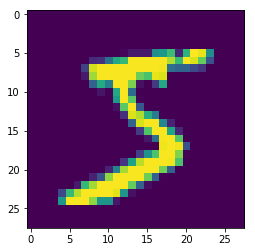

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-24 15:47:02.345250


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-24 15:47:02.532255


In [7]:
y_train[:10]
print(datetime.datetime.now())

2019-06-24 15:47:02.542729


In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-24 15:47:02.561765


In [9]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-24 15:47:02.570854


In [0]:
from keras.layers import Input,Conv2D, MaxPooling2D , GlobalAveragePooling2D, Flatten
from keras.models import Model
from keras.activations import softmax


In [11]:
## MAIN BLOCK
x1 = Input(shape=(28,28,1,))

x2 = Conv2D(64, (3, 3), padding='same', activation='relu')(x1) # 3 # 28*28*64
x2o = keras.layers.concatenate([x1 , x2])
x3 = Conv2D(64, (3, 3), padding='same', activation='relu')(x2o) # 5 #28*28*64
x3o = keras.layers.concatenate([x1,x2,x3])
x4 = MaxPooling2D((2, 2), strides=(1, 1))(x3o) # 10 #14*14*64

x5 = Conv2D(64, (3, 3), padding='same', activation='relu')(x4) # 12 #14*14*64
x5o = keras.layers.concatenate([x4,x5])
x6 = Conv2D(64, (3, 3), padding='same', activation='relu')(x5o) #14 #14*14*64
x6o = keras.layers.concatenate([x4,x5,x6])
x7 = Conv2D(64, (3, 3), padding='same', activation='relu')(x6o) # 16 #14*14*64
x7o = keras.layers.concatenate([x5,x6,x7])
x8 = MaxPooling2D((2, 2), strides=(1, 1))(x7o) #32 #7*7*64

x9 = Conv2D(64, (3, 3), padding='same', activation='relu')(x8) # 34 #7*7*64
x9o = keras.layers.concatenate([x8,x9])
x10 = Conv2D(64, (3, 3), padding='same', activation='relu')(x9o) # 36 #7*7*64
x10o = keras.layers.concatenate([x8,x9,x10])
x11 = Conv2D(32, (3, 3), padding='same', activation='relu')(x10o) # 38 #7*7*32

x12 = Conv2D(10, (26, 26), activation='softmax')(x11) # 40 #1*1*10

x13 = GlobalAveragePooling2D()(x12)

# from keras.layers import Activation
# model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))

# print(datetime.datetime.now())

W0624 15:47:02.641970 139901035915136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 15:47:02.666170 139901035915136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 15:47:02.671510 139901035915136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 15:47:02.713751 139901035915136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
model = Model(inputs=x1 , outputs = x13 )

In [13]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 28, 28, 65)   0           input_1[0][0]                    
                                                                 conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 64)   37504       concatenate_1[0][0]              
__________

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

W0624 15:47:02.892787 139901035915136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0624 15:47:02.930710 139901035915136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



2019-06-24 15:47:02.951868


In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test,Y_test))
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0624 15:47:03.076302 139901035915136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0624 15:47:03.457101 139901035915136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.1138 - acc: 0.9656 - val_loss: 0.0462 - val_acc: 0.9840
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0473 - acc: 0.9858 - val_loss: 0.0458 - val_acc: 0.9846
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0343 - acc: 0.9887 - val_loss: 0.0471 - val_acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0264 - acc: 0.9915 - val_loss: 0.0355 - val_acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0215 - acc: 0.9929 - val_loss: 0.0346 - val_acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0484 - val_acc: 0.9880
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0147 - acc: 0.9953 - val_loss: 0.0397 - 

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-24 16:04:11.797732


In [17]:
print(score)
print(datetime.datetime.now())

[0.041192578854943894, 0.9909]
2019-06-24 16:04:11.807656
